<a href="https://colab.research.google.com/github/ritusingla/deep-image-prior/blob/master/loss_acc_graphs_flash_no_flash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for **"Flash/No Flash"** figure. 

In [15]:
"""
*Uncomment if running on colab* 
Set Runtime -> Change runtime type -> Under Hardware Accelerator select GPU in Google Colab 
"""
!git clone https://github.com/ritusingla/deep-image-prior
!mv deep-image-prior/* ./

fatal: destination path 'deep-image-prior' already exists and is not an empty directory.
mv: cannot stat 'deep-image-prior/*': No such file or directory


# Import libs

In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
from models import *

import torch
import torch.optim

from utils.denoising_utils import *
from utils.sr_utils import load_LR_HR_imgs_sr
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True

# Load image

HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)


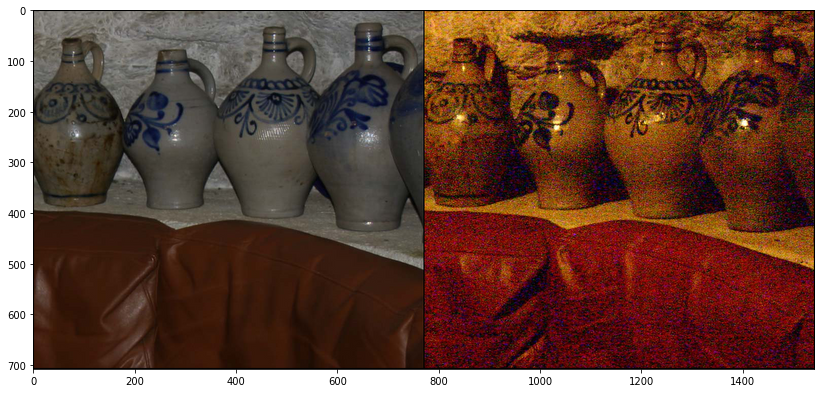

In [17]:
imgs = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')
img_flash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_flash_np = pil_to_np(img_flash)

img_noflash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_01_noflash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_noflash_np = pil_to_np(img_noflash)

g = plot_image_grid([img_flash_np, img_noflash_np],3,12)

# Setup

In [0]:
pad = 'reflection'
OPT_OVER = 'net'

num_iter = 601
LR = 0.1 
OPTIMIZER = 'adam'
reg_noise_std = 0.0
show_every = 50
figsize = 6

# We will use flash image as input
input_depth = 3
net_input =np_to_torch(img_flash_np).type(dtype)

In [0]:
net = skip(input_depth, 3, num_channels_down = [128, 128, 128, 128, 128], 
                        num_channels_up   = [128, 128, 128, 128, 128],
                        num_channels_skip = [4, 4, 4, 4, 4], 
                        upsample_mode=['nearest', 'nearest', 'bilinear', 'bilinear', 'bilinear'], 
                        need_sigmoid=True, need_bias=True, pad=pad).type(dtype)

mse = torch.nn.MSELoss().type(dtype)

img_flash_var = np_to_torch(img_flash_np).type(dtype)
img_noflash_var = np_to_torch(img_noflash_np).type(dtype)

# Optimize

Starting optimization with ADAM


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


Iteration 00000    Loss 0.167331

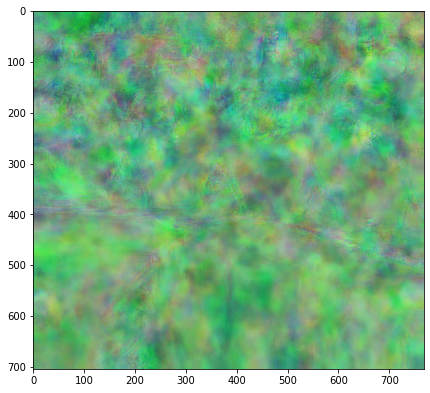

Iteration 00001    Loss 0.049540Iteration 00002    Loss 0.080796Iteration 00003    Loss 0.077888Iteration 00004    Loss 0.075760Iteration 00005    Loss 0.087076Iteration 00006    Loss 0.073838Iteration 00007    Loss 0.044111Iteration 00008    Loss 0.037084Iteration 00009    Loss 0.036643Iteration 00010    Loss 0.028842Iteration 00011    Loss 0.024404Iteration 00012    Loss 0.024099Iteration 00013    Loss 0.021425Iteration 00014    Loss 0.021780Iteration 00015    Loss 0.020223Iteration 00016    Loss 0.019409Iteration 00017    Loss 0.018651Iteration 00018    Loss 0.018378Iteration 00019    Loss 0.017925Iteration 00020    Loss 0.017630Iteration 00021    Loss 0.017104Iteration 00022    Loss 0.016901Iteration 00023    Loss 0.016623Iteration 00024    Loss 0.016237Iteration 00025    Loss 0.016073Iteration 00026    Loss 0.015756Iteration 00027    Loss 0.015522Iteration 00028    Loss 0.015225Iteration 00029    Loss 0.014981Iteration 00030    Loss 0.014695Iteration 00031    Loss 0.014514Iteratio

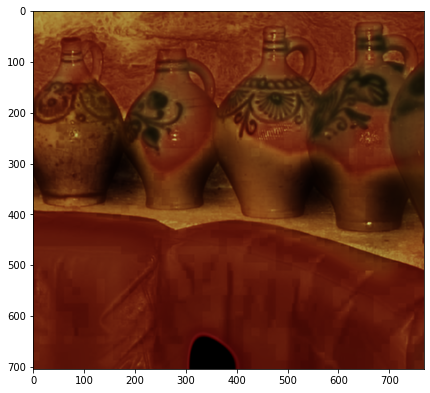

Iteration 00051    Loss 0.012574Iteration 00052    Loss 0.012589Iteration 00053    Loss 0.012346Iteration 00054    Loss 0.012355Iteration 00055    Loss 0.012165Iteration 00056    Loss 0.012449Iteration 00057    Loss 0.012998Iteration 00058    Loss 0.012180Iteration 00059    Loss 0.011798Iteration 00060    Loss 0.012046Iteration 00061    Loss 0.012016Iteration 00062    Loss 0.011851Iteration 00063    Loss 0.011509Iteration 00064    Loss 0.011616Iteration 00065    Loss 0.012524Iteration 00066    Loss 0.013560Iteration 00067    Loss 0.013579Iteration 00068    Loss 0.012207Iteration 00069    Loss 0.014038Iteration 00070    Loss 0.013750Iteration 00071    Loss 0.012701Iteration 00072    Loss 0.012894Iteration 00073    Loss 0.013269Iteration 00074    Loss 0.011926Iteration 00075    Loss 0.013392Iteration 00076    Loss 0.012499Iteration 00077    Loss 0.011785Iteration 00078    Loss 0.012874Iteration 00079    Loss 0.011733Iteration 00080    Loss 0.011837Iteration 00081    Loss 0.012168Iteratio

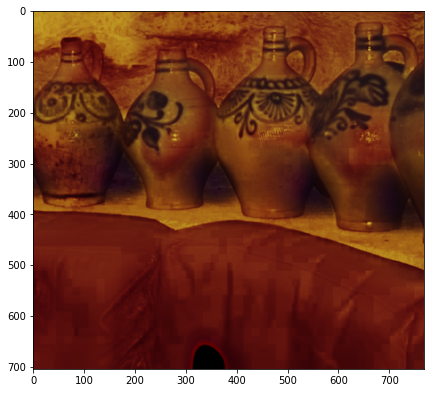

Iteration 00101    Loss 0.010255Iteration 00102    Loss 0.010327Iteration 00103    Loss 0.010303Iteration 00104    Loss 0.010298Iteration 00105    Loss 0.010121Iteration 00106    Loss 0.010131Iteration 00107    Loss 0.010042Iteration 00108    Loss 0.010031Iteration 00109    Loss 0.009971Iteration 00110    Loss 0.009868Iteration 00111    Loss 0.009907Iteration 00112    Loss 0.009882Iteration 00113    Loss 0.009755Iteration 00114    Loss 0.009714Iteration 00115    Loss 0.009730Iteration 00116    Loss 0.009687Iteration 00117    Loss 0.009572Iteration 00118    Loss 0.009468Iteration 00119    Loss 0.009436Iteration 00120    Loss 0.009456Iteration 00121    Loss 0.009658Iteration 00122    Loss 0.009698Iteration 00123    Loss 0.009417Iteration 00124    Loss 0.009336Iteration 00125    Loss 0.009474Iteration 00126    Loss 0.009447Iteration 00127    Loss 0.012466Iteration 00128    Loss 0.034095Iteration 00129    Loss 0.041920Iteration 00130    Loss 0.033501Iteration 00131    Loss 0.033537Iteratio

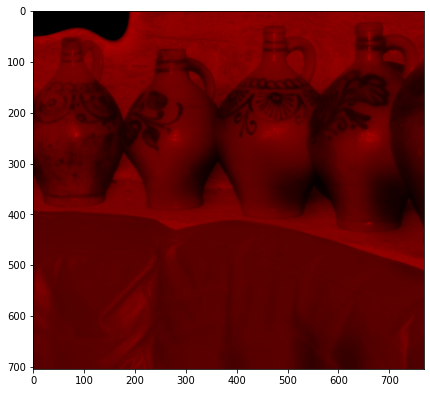

Iteration 00151    Loss 0.032350Iteration 00152    Loss 0.029234Iteration 00153    Loss 0.031428Iteration 00154    Loss 0.028987Iteration 00155    Loss 0.030094Iteration 00156    Loss 0.028453Iteration 00157    Loss 0.028953Iteration 00158    Loss 0.028052Iteration 00159    Loss 0.027993Iteration 00160    Loss 0.027446Iteration 00161    Loss 0.027221Iteration 00162    Loss 0.026591Iteration 00163    Loss 0.026496Iteration 00164    Loss 0.026286Iteration 00165    Loss 0.026137Iteration 00166    Loss 0.025860Iteration 00167    Loss 0.026051Iteration 00168    Loss 0.025662Iteration 00169    Loss 0.025672Iteration 00170    Loss 0.025478Iteration 00171    Loss 0.025490Iteration 00172    Loss 0.025327Iteration 00173    Loss 0.025217Iteration 00174    Loss 0.025174Iteration 00175    Loss 0.025055Iteration 00176    Loss 0.025068Iteration 00177    Loss 0.024927Iteration 00178    Loss 0.024863Iteration 00179    Loss 0.024756Iteration 00180    Loss 0.024684Iteration 00181    Loss 0.024628Iteratio

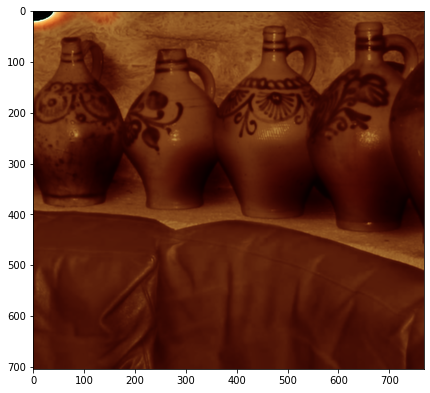

Iteration 00201    Loss 0.013853Iteration 00202    Loss 0.014683Iteration 00203    Loss 0.014836Iteration 00204    Loss 0.014612Iteration 00205    Loss 0.014492Iteration 00206    Loss 0.013337Iteration 00207    Loss 0.013488Iteration 00208    Loss 0.013032Iteration 00209    Loss 0.013065Iteration 00210    Loss 0.012402Iteration 00211    Loss 0.012250Iteration 00212    Loss 0.011891Iteration 00213    Loss 0.011788Iteration 00214    Loss 0.011716Iteration 00215    Loss 0.011196Iteration 00216    Loss 0.011169Iteration 00217    Loss 0.010820Iteration 00218    Loss 0.010776Iteration 00219    Loss 0.010797Iteration 00220    Loss 0.010709Iteration 00221    Loss 0.010532Iteration 00222    Loss 0.010426Iteration 00223    Loss 0.010192Iteration 00224    Loss 0.010127Iteration 00225    Loss 0.009993Iteration 00226    Loss 0.009973Iteration 00227    Loss 0.009884Iteration 00228    Loss 0.009877Iteration 00229    Loss 0.009786Iteration 00230    Loss 0.009728Iteration 00231    Loss 0.009624Iteratio

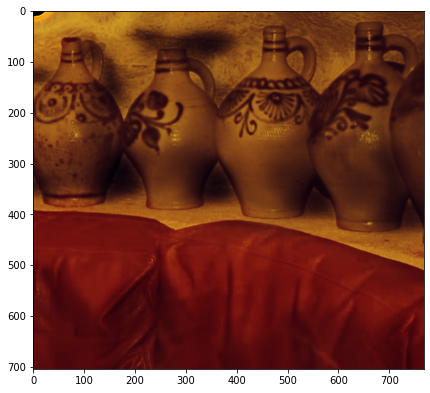

Iteration 00251    Loss 0.008830Iteration 00252    Loss 0.008798Iteration 00253    Loss 0.008774Iteration 00254    Loss 0.008757Iteration 00255    Loss 0.008774Iteration 00256    Loss 0.008963Iteration 00257    Loss 0.009542Iteration 00258    Loss 0.009820Iteration 00259    Loss 0.009316Iteration 00260    Loss 0.009462Iteration 00261    Loss 0.009068Iteration 00262    Loss 0.009242Iteration 00263    Loss 0.009147Iteration 00264    Loss 0.009012Iteration 00265    Loss 0.009142Iteration 00266    Loss 0.008989Iteration 00267    Loss 0.008936Iteration 00268    Loss 0.008882Iteration 00269    Loss 0.008847Iteration 00270    Loss 0.008821Iteration 00271    Loss 0.008809Iteration 00272    Loss 0.008754Iteration 00273    Loss 0.008685Iteration 00274    Loss 0.008684Iteration 00275    Loss 0.008652Iteration 00276    Loss 0.008621Iteration 00277    Loss 0.008601Iteration 00278    Loss 0.008578Iteration 00279    Loss 0.008552Iteration 00280    Loss 0.008525Iteration 00281    Loss 0.008503Iteratio

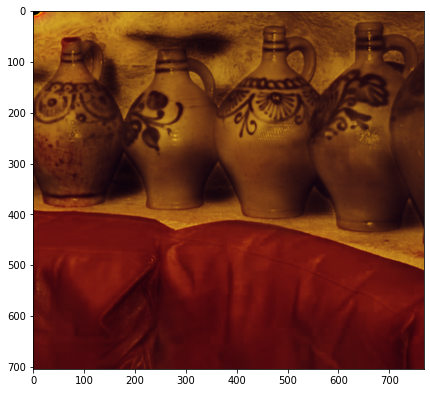

Iteration 00301    Loss 0.008226Iteration 00302    Loss 0.008168Iteration 00303    Loss 0.008144Iteration 00304    Loss 0.008189Iteration 00305    Loss 0.008299Iteration 00306    Loss 0.008256Iteration 00307    Loss 0.008165Iteration 00308    Loss 0.008198Iteration 00309    Loss 0.008238Iteration 00310    Loss 0.008107Iteration 00311    Loss 0.008107Iteration 00312    Loss 0.008141Iteration 00313    Loss 0.008120Iteration 00314    Loss 0.008220Iteration 00315    Loss 0.008541Iteration 00316    Loss 0.008619Iteration 00317    Loss 0.008409Iteration 00318    Loss 0.008192Iteration 00319    Loss 0.008356Iteration 00320    Loss 0.008143Iteration 00321    Loss 0.008238Iteration 00322    Loss 0.008091Iteration 00323    Loss 0.008159Iteration 00324    Loss 0.008093Iteration 00325    Loss 0.008101Iteration 00326    Loss 0.008143Iteration 00327    Loss 0.008170Iteration 00328    Loss 0.008027Iteration 00329    Loss 0.007998Iteration 00330    Loss 0.008135Iteration 00331    Loss 0.008267Iteratio

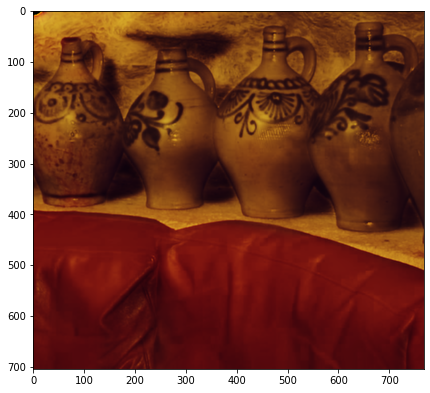

Iteration 00351    Loss 0.007959Iteration 00352    Loss 0.007866Iteration 00353    Loss 0.007932Iteration 00354    Loss 0.007989Iteration 00355    Loss 0.007967Iteration 00356    Loss 0.007877Iteration 00357    Loss 0.007772Iteration 00358    Loss 0.007833Iteration 00359    Loss 0.007844Iteration 00360    Loss 0.007853Iteration 00361    Loss 0.007791Iteration 00362    Loss 0.007710Iteration 00363    Loss 0.007730Iteration 00364    Loss 0.007696Iteration 00365    Loss 0.007732Iteration 00366    Loss 0.007770Iteration 00367    Loss 0.007856Iteration 00368    Loss 0.007971Iteration 00369    Loss 0.007870Iteration 00370    Loss 0.007734Iteration 00371    Loss 0.007754Iteration 00372    Loss 0.007766Iteration 00373    Loss 0.007790Iteration 00374    Loss 0.007756Iteration 00375    Loss 0.007617Iteration 00376    Loss 0.007673Iteration 00377    Loss 0.007692Iteration 00378    Loss 0.007640Iteration 00379    Loss 0.007643Iteration 00380    Loss 0.007590Iteration 00381    Loss 0.007624Iteratio

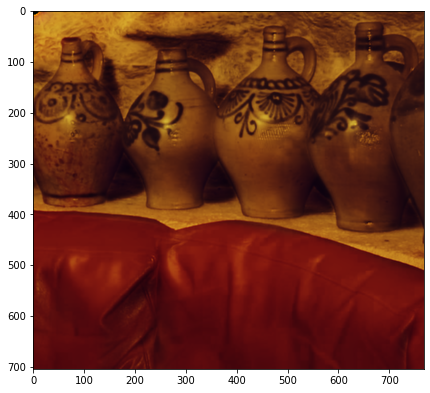

Iteration 00401    Loss 0.007568Iteration 00402    Loss 0.007616Iteration 00403    Loss 0.007578Iteration 00404    Loss 0.007502Iteration 00405    Loss 0.007482Iteration 00406    Loss 0.007502Iteration 00407    Loss 0.007484Iteration 00408    Loss 0.007469Iteration 00409    Loss 0.007490Iteration 00410    Loss 0.007436Iteration 00411    Loss 0.007463Iteration 00412    Loss 0.007508Iteration 00413    Loss 0.007521Iteration 00414    Loss 0.007540Iteration 00415    Loss 0.007522Iteration 00416    Loss 0.007443Iteration 00417    Loss 0.007437Iteration 00418    Loss 0.007413Iteration 00419    Loss 0.007388Iteration 00420    Loss 0.007359Iteration 00421    Loss 0.007368Iteration 00422    Loss 0.007342Iteration 00423    Loss 0.007353Iteration 00424    Loss 0.007376Iteration 00425    Loss 0.007357Iteration 00426    Loss 0.007360Iteration 00427    Loss 0.007424Iteration 00428    Loss 0.007582Iteration 00429    Loss 0.007942Iteration 00430    Loss 0.007661Iteration 00431    Loss 0.007389Iteratio

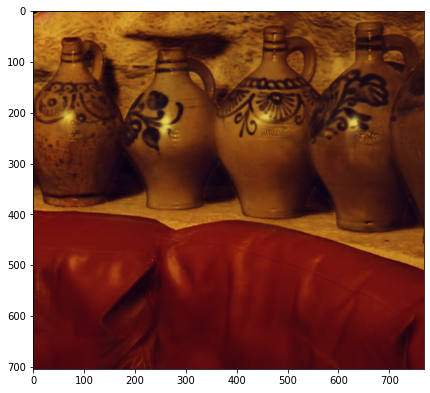

Iteration 00451    Loss 0.007293Iteration 00452    Loss 0.007280Iteration 00453    Loss 0.007243Iteration 00454    Loss 0.007254Iteration 00455    Loss 0.007216Iteration 00456    Loss 0.007247Iteration 00457    Loss 0.007241Iteration 00458    Loss 0.007321Iteration 00459    Loss 0.007521Iteration 00460    Loss 0.007972Iteration 00461    Loss 0.007519Iteration 00462    Loss 0.007744Iteration 00463    Loss 0.007582Iteration 00464    Loss 0.007577Iteration 00465    Loss 0.007482Iteration 00466    Loss 0.007869Iteration 00467    Loss 0.008516Iteration 00468    Loss 0.008111Iteration 00469    Loss 0.008238Iteration 00470    Loss 0.008155Iteration 00471    Loss 0.008135Iteration 00472    Loss 0.007937Iteration 00473    Loss 0.007914Iteration 00474    Loss 0.007833Iteration 00475    Loss 0.007783Iteration 00476    Loss 0.007771Iteration 00477    Loss 0.007686Iteration 00478    Loss 0.007654Iteration 00479    Loss 0.007655Iteration 00480    Loss 0.007575Iteration 00481    Loss 0.007531Iteratio

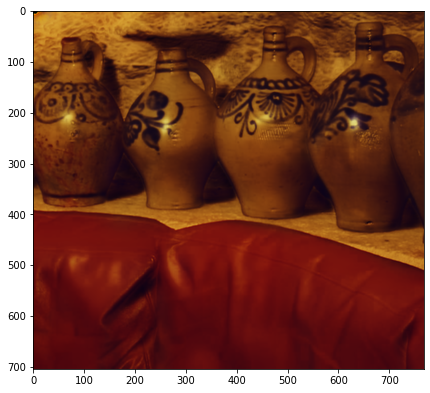

Iteration 00501    Loss 0.007277Iteration 00502    Loss 0.007373Iteration 00503    Loss 0.007680Iteration 00504    Loss 0.007403Iteration 00505    Loss 0.007273Iteration 00506    Loss 0.007439Iteration 00507    Loss 0.007382Iteration 00508    Loss 0.007241Iteration 00509    Loss 0.007312Iteration 00510    Loss 0.007398Iteration 00511    Loss 0.007203Iteration 00512    Loss 0.007226Iteration 00513    Loss 0.007301Iteration 00514    Loss 0.007210Iteration 00515    Loss 0.007174Iteration 00516    Loss 0.007183Iteration 00517    Loss 0.007190Iteration 00518    Loss 0.007118Iteration 00519    Loss 0.007149Iteration 00520    Loss 0.007156Iteration 00521    Loss 0.007079Iteration 00522    Loss 0.007110Iteration 00523    Loss 0.007132Iteration 00524    Loss 0.007075Iteration 00525    Loss 0.007072Iteration 00526    Loss 0.007083Iteration 00527    Loss 0.007071Iteration 00528    Loss 0.007055Iteration 00529    Loss 0.007044Iteration 00530    Loss 0.007054Iteration 00531    Loss 0.007040Iteratio

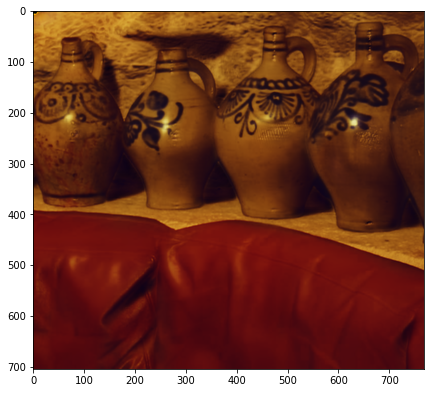

Iteration 00551    Loss 0.006995Iteration 00552    Loss 0.007045Iteration 00553    Loss 0.007084Iteration 00554    Loss 0.007009Iteration 00555    Loss 0.007061Iteration 00556    Loss 0.007027Iteration 00557    Loss 0.007041Iteration 00558    Loss 0.007013Iteration 00559    Loss 0.006982Iteration 00560    Loss 0.006974Iteration 00561    Loss 0.006962Iteration 00562    Loss 0.006981Iteration 00563    Loss 0.006976Iteration 00564    Loss 0.006972Iteration 00565    Loss 0.007005Iteration 00566    Loss 0.007048Iteration 00567    Loss 0.007110Iteration 00568    Loss 0.007131Iteration 00569    Loss 0.007016Iteration 00570    Loss 0.006978Iteration 00571    Loss 0.007020Iteration 00572    Loss 0.007009Iteration 00573    Loss 0.006996Iteration 00574    Loss 0.007026Iteration 00575    Loss 0.007017Iteration 00576    Loss 0.006955Iteration 00577    Loss 0.006943Iteration 00578    Loss 0.006977Iteration 00579    Loss 0.006978Iteration 00580    Loss 0.006950Iteration 00581    Loss 0.006941Iteratio

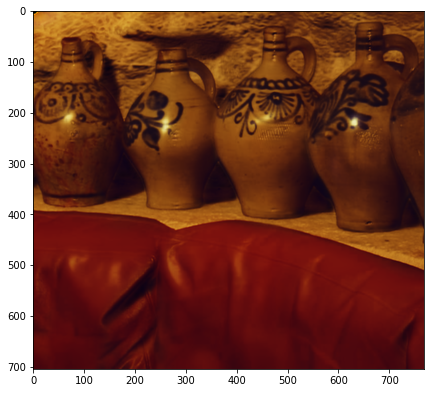

In [20]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()

l=[]
i = 0
def closure():
    
    global i, net_input,l
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
   
    total_loss = mse(out, img_noflash_var)
    l=np.append(l,total_loss.item())
    
    total_loss.backward()
        
    print ('Iteration %05d    Loss %f' % (i, total_loss.item()), sep='\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
        
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

Sometimes the process stucks at reddish image, just run the code from the top one more time. 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


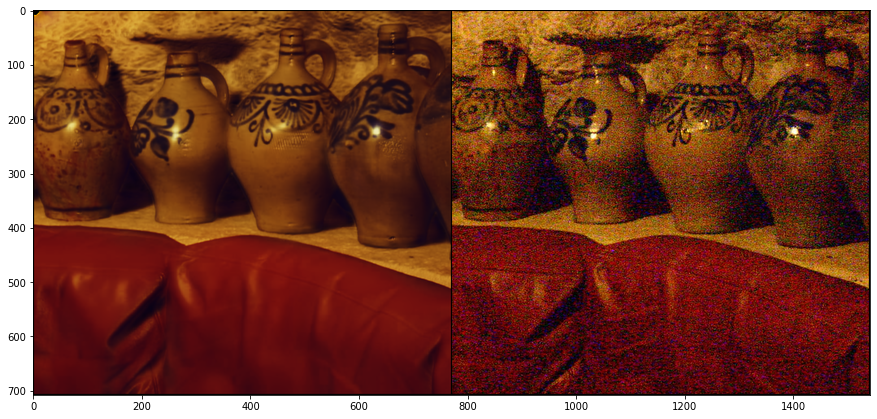

In [21]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_noflash_np], factor=13);

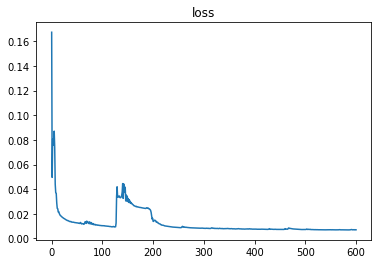

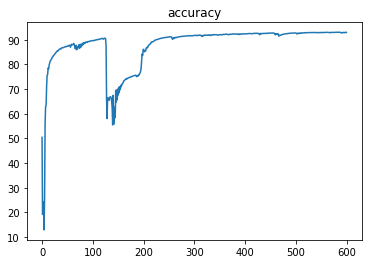

In [22]:
plt.title('loss')
plt.plot(l)
acc=[]
acc= 100-(l*1000)
acc=acc[1:]
#plt.legend()
plt.show()
plt.title('accuracy')
plt.plot(acc)
#plt.legend()
plt.show()

In [23]:
!apt install caffe-cuda
import numpy as np
import matplotlib.pyplot as plt
import caffe
import os
import skimage.color as color
import scipy.ndimage.interpolation as sni

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
caffe-cuda is already the newest version (1.0.0-6build1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [24]:
!wget -O models/colorization_release_v1.caffemodel http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel

--2020-05-26 09:15:06--  http://eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving eecs.berkeley.edu (eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1
Connecting to eecs.berkeley.edu (eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel [following]
--2020-05-26 09:15:06--  https://people.eecs.berkeley.edu/~rich.zhang/projects/2016_colorization/files/demo_v1/colorization_release_v1.caffemodel
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128948189 (123M)
Saving to: ‘models/colorization_release_v1.caffemodel’

models/colorization 100%[===================

In [0]:
gpu_id = 0
caffe.set_mode_gpu()
caffe.set_device(gpu_id)
net = caffe.Net('models/colorization_deploy_v1.prototxt', 'models/colorization_release_v1.caffemodel', caffe.TEST)

(H_in,W_in) = net.blobs['data_l'].data.shape[2:] # get input shape
(H_out,W_out) = net.blobs['class8_ab'].data.shape[2:] # get output shape
net.blobs['Trecip'].data[...] = 6/np.log(10) # 1/T, set annealing temperature
    # (We found that we had introduced a factor of log(10). We will update the arXiv shortly.)

In [26]:
# load the original image
import cv2
# cv2.imwrite('demo/imgs/x.jpg',out_np)
# img_rgb = cv2.imread('demo/imgs/x.jpg')
# img_rgb=img_rgb/255
# out_np=out_np/255
# img_rgb= np.clip(out_np, 0, 1)
out_np=out_np/255
print(out_np.shape)

img_lab = color.rgb2lab(out_np) # convert image to lab color space
# img_lab = color.rgb2lab(img_rgb) # convert image to lab color space
img_l = img_lab[:,:,0] # pull out L channel
(H_orig,W_orig) = img_rgb.shape[:2] # original image size

# create grayscale version of image (just for displaying)
img_lab_bw = img_lab.copy()
img_lab_bw[:,:,1:] = 0
img_rgb_bw = color.lab2rgb(img_lab_bw)

# resize image to network input size
img_rs = caffe.io.resize_image(img_rgb,(H_in,W_in)) # resize image to network input size
img_lab_rs = color.rgb2lab(img_rs)
img_l_rs = img_lab_rs[:,:,0]

# show original image, along with grayscale input
# img_pad = np.ones((H_orig,W_orig/10,3))
plt.imshow(np.hstack((img_rgb,  img_rgb_bw)))
plt.axis('off');

ValueError: ignored